In [129]:
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from eda import paid_vs_unpaid
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

plt.style.use('ggplot')




In [106]:
df = pd.read_csv('../data/data.csv')

In [107]:
df.head()

,Unnamed: 0,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,unpaid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,6316,1,0.1392,426.72,11.813030,4.95,787,10260.000000,12115,14.1,1,0,0,0,0,0,0,0,0,1
1,2639,1,0.1505,693.83,11.282304,15.32,682,4379.958333,18636,81.1,3,0,0,0,0,1,0,0,0,0
2,5553,1,0.0859,316.11,11.233212,4.75,752,5220.000000,22078,19.8,2,0,0,0,0,0,0,1,0,0
3,3260,1,0.1158,165.07,10.778956,0.38,747,3510.000000,536,7.8,3,0,0,0,0,0,0,0,0,0
4,6203,1,0.1496,173.23,10.335166,14.69,672,4800.041667,11886,90.0,0,0,0,0,0,1,0,0,0,0


In [108]:
df = df.rename(columns={'not.fully.paid' : 'unpaid'}) 
cols = df.columns.tolist() 
cols = [col.replace('.', '_') for col in cols] 
df.columns = cols

In [96]:
variable = ['purpose']
df_one_hot = pd.get_dummies(df,columns=variable,drop_first=True)

KeyError: "None of [Index(['purpose'], dtype='object')] are in the [columns]"

In [97]:
df_one_hot.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,unpaid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [98]:
paid_customers = df[df['unpaid'] == 0]
un_paid_customers = df[df['unpaid'] == 1]

paid, un_paid = paid_vs_unpaid(df)
paid_sample = paid.sample(n=len(un_paid['unpaid']))
df_balanced = pd.concat([paid_sample, un_paid])

In [99]:
df_balanced

,Unnamed: 0,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,unpaid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1455,6137,1,0.1114,656.07,11.225243,11.31,777,3000.041667,1126,7.9,0,0,0,0,0,0,0,0,0,0
455,7392,1,0.1136,164.56,10.714418,6.51,687,4620.041667,5971,67.9,1,0,1,0,0,1,0,0,0,0
1704,9350,0,0.1947,885.52,11.264464,12.14,682,1799.958333,22161,75.9,4,0,0,0,0,0,0,0,0,1
748,3840,1,0.1158,99.05,11.552146,15.18,712,7139.958333,21072,94.6,1,0,0,0,0,0,0,0,0,0
935,9331,0,0.1392,102.42,9.574983,9.31,687,1202.000000,3745,64.6,4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,9279,0,0.1565,839.67,12.691580,5.32,682,13590.000000,388892,6.1,4,1,0,1,0,0,0,0,0,0
1903,9093,0,0.1442,137.54,10.596635,22.32,707,7409.958333,12121,89.8,7,1,0,1,0,1,0,0,0,0
1905,4670,1,0.1531,448.25,10.819778,24.17,672,3390.000000,6256,71.9,0,0,0,1,0,1,0,0,0,0
1914,8612,0,0.1482,242.05,11.390758,16.30,647,3180.000000,9600,72.7,4,0,0,1,0,1,0,0,0,0


In [109]:
X = df_one_hot.drop('unpaid', axis=1)
y = df_one_hot['unpaid']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=3, max_features=2, min_samples_leaf=3, n_estimators=300)
#model = RandomForestClassifier(random_state=42)
model = RandomForestClassifier(random_state=1, n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 1, bootstrap='True')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [125]:
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Decision Tree Accuracy: 0.8423799582463466
Confusion Matrix: [[1611    5]
 [ 297    3]]
Precision: 0.375
Recall: 0.01


In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)
gb_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42,
                                        min_samples_leaf=200, max_depth=3, max_features=3)


In [113]:
gb_model.fit(X_train2, y_train2)
y_pred_gb = gb_model.predict(X_test2)

In [114]:
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test2, y_pred_gb))
print("Confusion Matrix:", confusion_matrix(y_test2, y_pred_gb))
print("Precision:", precision_score(y_test2, y_pred_gb))
print("Recall:", recall_score(y_test2, y_pred_gb))

Decision Tree Accuracy: 0.8590814196242171
Confusion Matrix: [[1630   15]
 [ 255   16]]
Precision: 0.5161290322580645
Recall: 0.05904059040590406


In [ ]:
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    """
    Grid search
    Args:
        estimator: the type of model (e.g. RandomForestClassifier())
        paramter_grid: dictionary defining the gridsearch parameters
        X_train: ndarray - 2D
        y_train: ndarray - 1D
    Returns:  
        Best parameters and model fit with those parameters
    """

    model_gridsearch = RandomizedSearchCV(estimator,
                                    parameter_grid, n_iter=100,
                                    n_jobs=-1,
                                    verbose=True)
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best




gradient_boosting_grid = {'learning_rate': [0.01, 0.2, 0.1, 0.05],
                                'max_depth': [3, 5],
                                'min_samples_leaf': [50, 100, 200],
                                'max_features': [2, 3],
                                'n_estimators': [300, 500],
                                'random_state': [2, 46, 42, 1],
                                 'criterion' : ['friedman_mse', 'mse', 'mae']}
ts = time()
gbc_best_params, gbc_best_model = gridsearch_with_output(GradientBoostingClassifier(), 
                                                                gradient_boosting_grid, 
                                                                X_train, y_train)
te= time()
print("Time passed:", te-ts)

In [ ]:
cost_TP = 5000; cost_FP = -1000; cost_FN = 0; cost_TN = 0
cb_matrix = np.array([[cost_TN, cost_FP], [cost_FN, cost_TP]])

In [ ]:
cb_matrix

In [ ]:
if model == RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
    print('true')
else:
    print('false')


In [ ]:
count = 0
for threshold in np.arange(0.0,1.0,0.01):
    thresholds.append(threshold)
    for model_type in models:
        count += 1
        predicted_proba = model_type.predict_proba(X_test)
        predicted = (predicted_proba [:,1] >= threshold).astype('int')
        accuracy = metrics.accuracy_score(y_test, predicted)
        if count % 2 == 1:
            print(f'Accuracy score for RF: {accuracy}', threshold)
            
        else:
            print(f'Accuracy score for GB: {accuracy}', threshold)



In [8]:
profits_gb= []
profits_rf= []
thresholds = []
count = 0
for threshold in np.arange(0.0,1.0,0.01):
    thresholds.append(threshold)
    for model_type in models:
        count += 1
        predicted_proba = model_type.predict_proba(X_test)
        predicted = (predicted_proba [:,1] >= threshold).astype('int')
        accuracy = metrics.accuracy_score(y_test, predicted)
        if count % 2 ==1 :
            full_matrix_rf = (confusion_matrix(y_test, predicted) * cb_matrix)
            profits_rf.append(np.sum(full_matrix_rf))
            #print('Cost matrix sum for RF:', np.sum(full_matrix_rf), 'Threshold:', threshold)
            print(f'Accuracy score for RF: {accuracy}')
            
        else:
            full_matrix_gb = confusion_matrix(y_test, predicted) * cb_matrix
            profits_gb.append(np.sum(full_matrix_gb))
            print(f'Accuracy score for GB: {accuracy}')
#             print('Cost matrix sum for GB:', np.sum(full_matrix_gb),'Threshold:', threshold)

NameError: name 'models' is not defined

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

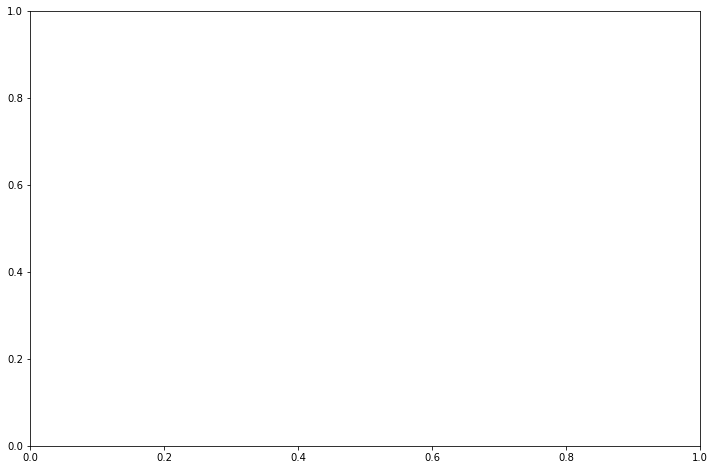

In [9]:
_, ax = plt.subplots(figsize=(12,8))
#ax.plot(thresholds, profits_rf, label='Random Forest', c='r')
ax.plot(thresholds, profits_gb, label='Gradient Boost', c='b')
plt.title('Profit Curve', size=20)
plt.xlabel('Loan Denial rate', size=20)
plt.ylabel('Profit (In millions)', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
ax.legend(loc='upper right')
plt.savefig('../images/profit_curve.png')
plt.show()

In [132]:
importances

array([0.05998051, 0.10950223, 0.10296302, 0.08456741, 0.07016277,
       0.10158726, 0.09561789, 0.07909497, 0.08652782, 0.12896968,
       0.00259614, 0.014135  , 0.0129355 , 0.01294209, 0.00183169,
       0.003326  , 0.00548112, 0.0277789 ])

In [140]:
X

,credit_policy,interest rate,installment,log_annual_inc,debt to income,fico,days with credit line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


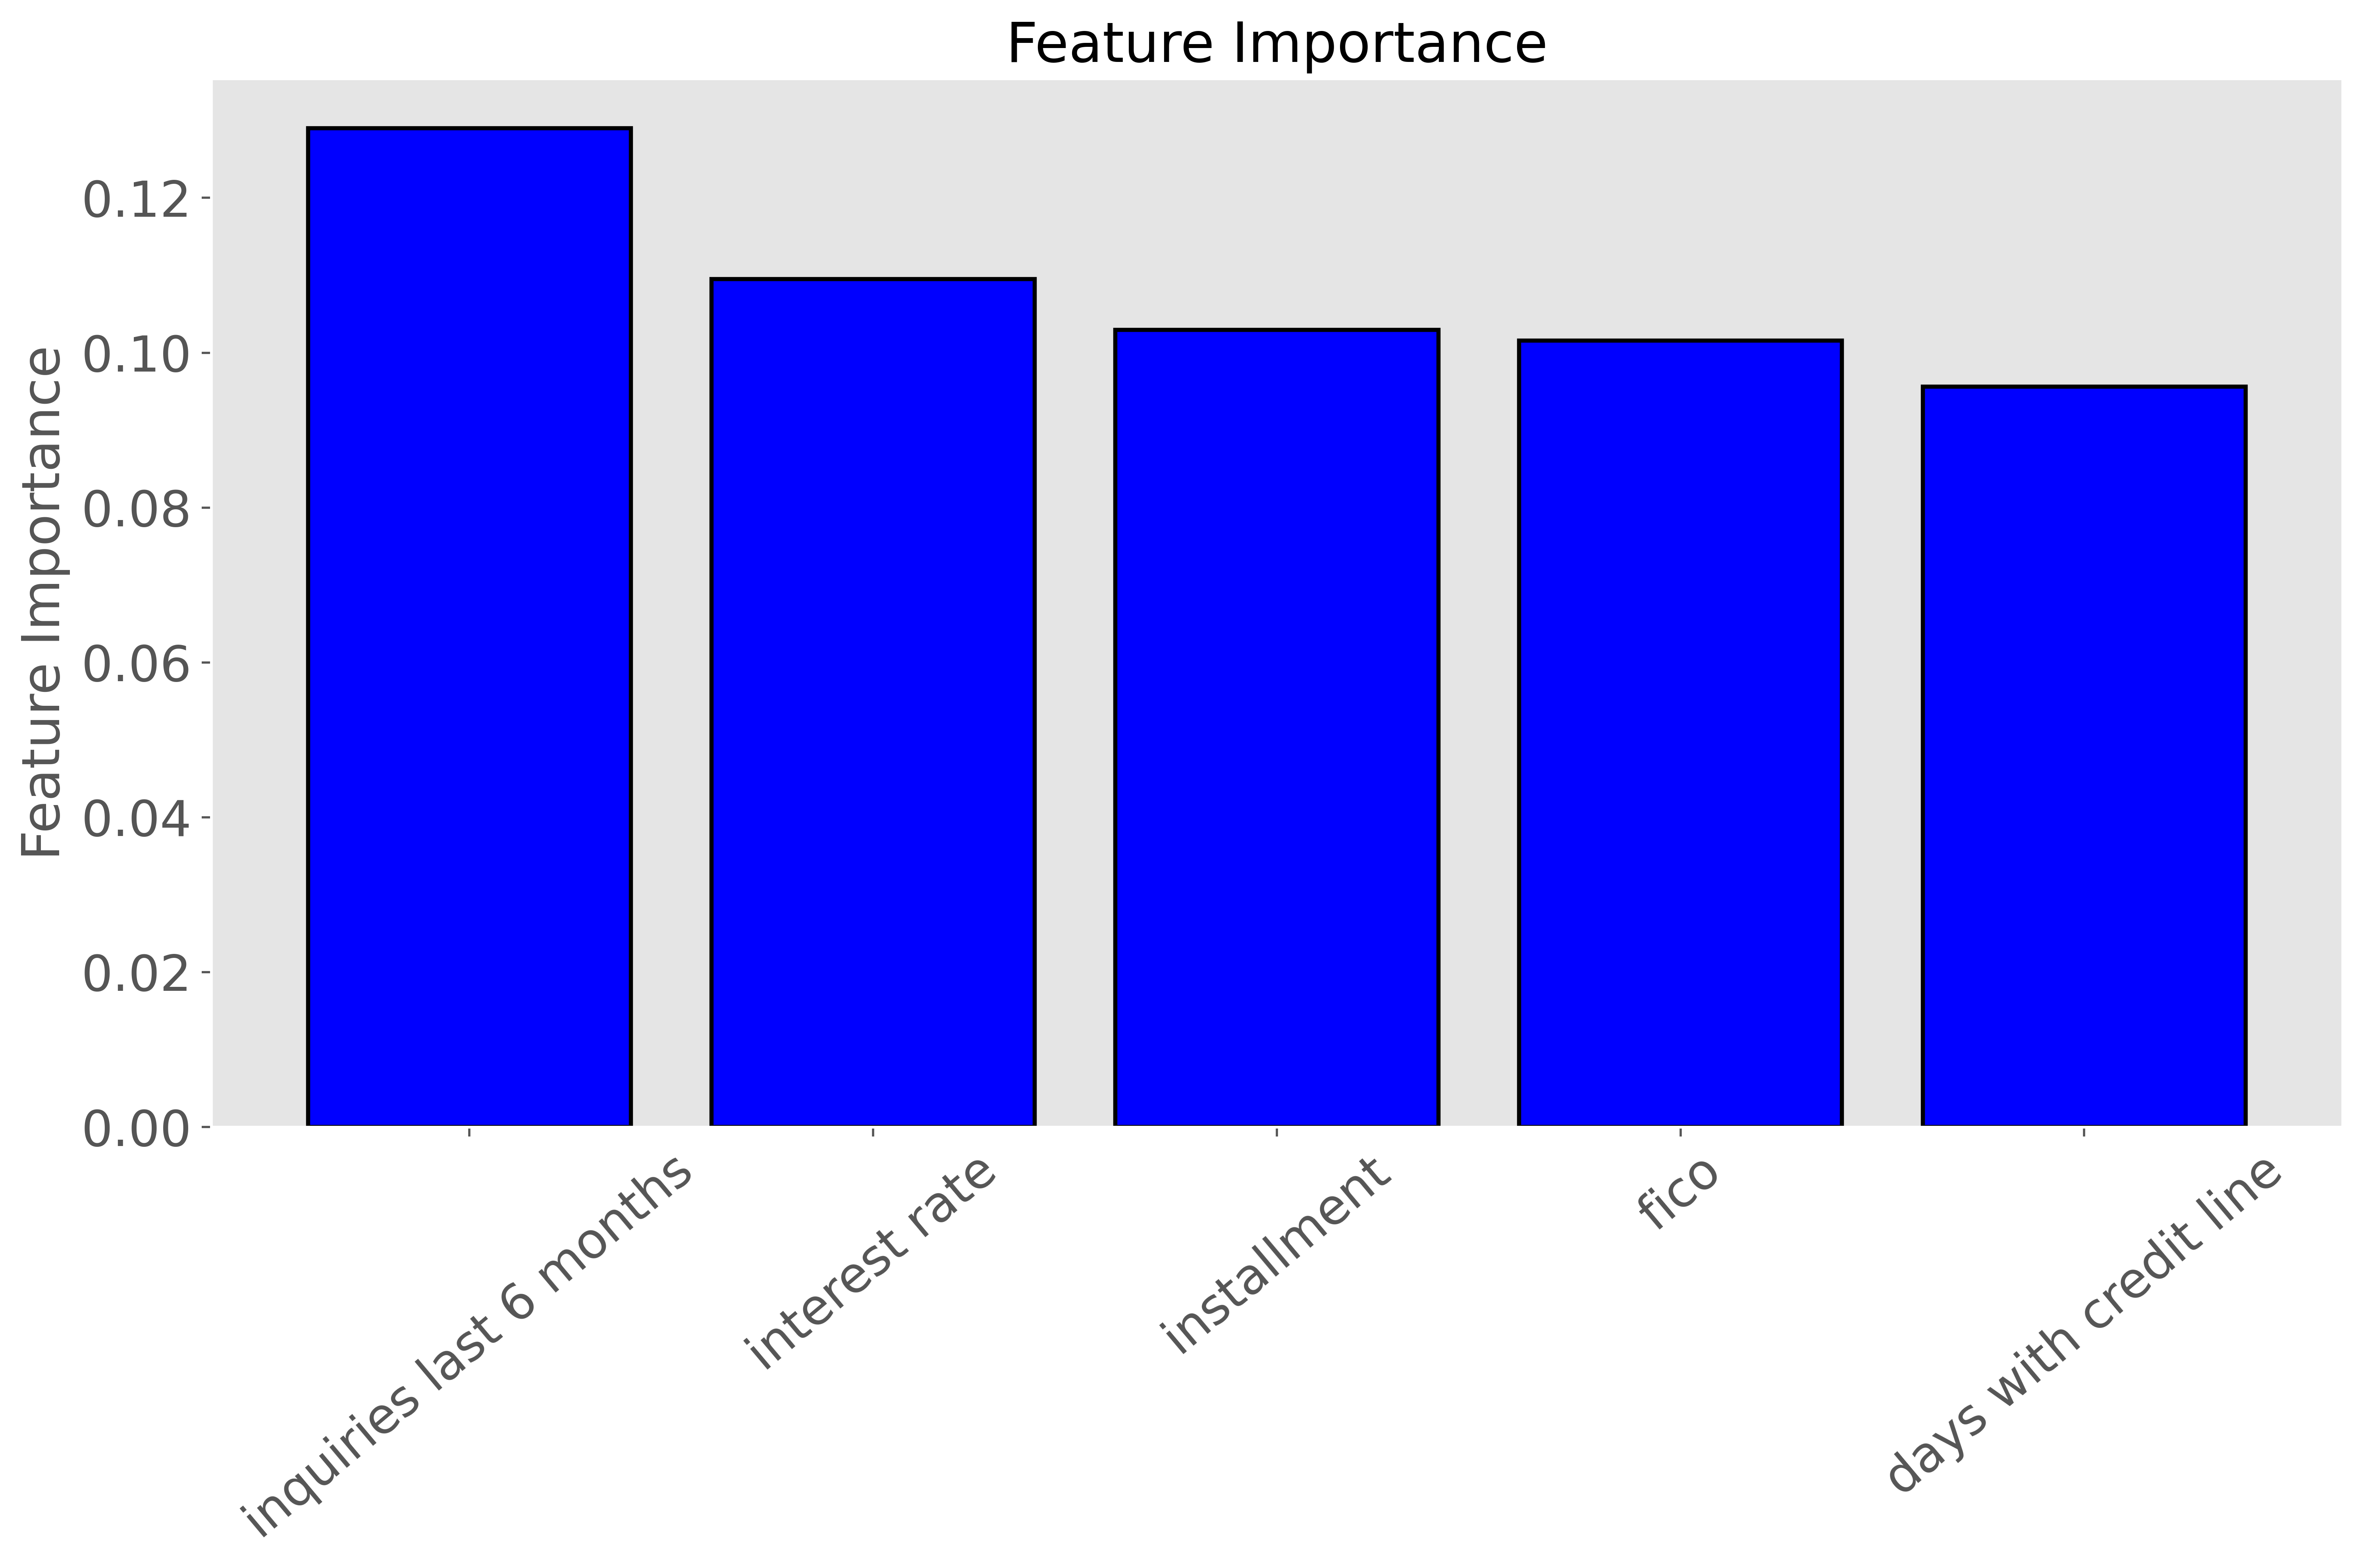

In [141]:
importances = gb_model.feature_importances_
X = X.rename(columns={'dti': 'debt to income'})
X = X.rename(columns={'inq_last_6mths': 'inquiries last 6 months'})
X = X.rename(columns={'int_rate': 'interest rate'})
X = X.rename(columns={'days_with_cr_line': 'days with credit line'})
indices = np.argsort(importances)[::-1]
cols = X.columns.to_numpy()
col_sort = cols[indices]
importance_sort = importances[indices]
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Feature Importance', size=20)
plt.bar(col_sort[:5], importance_sort[:5], edgecolor='black', lw=1.5, color='b')
plt.xticks(rotation=40, size=18)
plt.yticks(size=18)
#plt.xlabel('Feature', size=19)
plt.ylabel('Feature Importance', size=19)
plt.grid(b=None)
plt.tight_layout(pad=1.08)
# plt.show()
plt.savefig('../images/importance_final_gb.png')